Name: Utsa Poddar
UCID: 30071131

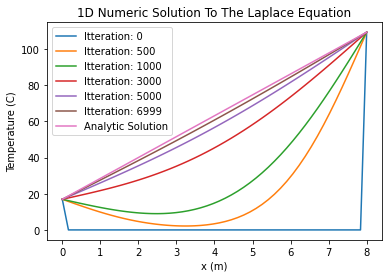

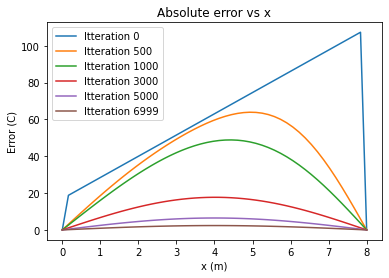

In [ ]:
import matplotlib.pylab as plt
import numpy as np
#You entered as seed for the random number generator: 875509875058768786
#The temperature (in degree Celsius) on the left extreme of the bar (x=0) is: 16.93316442124609
#The temperature (in degree Celsius) on the right extreme of the bar (x=L) is: 109.23770870521166
#The total length of the metallic bar (in meters) is: 8


itterations = 7000 # Number of itterations to compute
#creating a range for the itterations
itter_range = range(itterations)

#defining the initial conditions
N = 100 # Number of divisions in x
T_r=109.23770870521166
T_l=16.93316442124609
L=8

#creating a list of values of x
x = np.linspace(0, L, N)
#setting all the values of T to 0
T_list = np.zeros(N, dtype=np.double)
#defining the boundary conditions
T_list[-1] = T_r
T_list[0]=T_l
#making a list for the intermdiate curves of T(x)
T_select = [0,500, 1000, 3000,5000,itterations-1]
#a counter for the intermediate curves
select = 0

# define a function to calculate the interior difference and replace the interior value
def interior_difference(arr):
  #using the slicing method to determine T
  arr[1:-1] = (arr[0:-2] + arr[2:])/2

#making a list for the error curves which will be used later
error_select=[]
# recursive loop to apply interior difference function 10000 times and plot the current curve at select values of the itteration
for i in itter_range:
  #calling the interior difference function and passing the T_list to get all the curves
  interior_difference(T_list)
  #selecting which curves to display on the graph using the list for the intermdiate curves of T(x)
  if i == T_select[select]:
    #labeling which iteration the curve was obtained
    plt.plot(x, T_list, label="Itteration: %d" % (i))
    #adding the T_lists to the previously created error_select list
    error_select.append(list(T_list))
    #increasing the counter by one each time the if statement is satisfied
    select += 1

#ploting the analytical curve
plt.plot(x, ((T_r-T_l)/L)*x+T_l, label="Analytic Solution")
#adding the title and axis label with units
plt.title("1D Numeric Solution To The Laplace Equation")
plt.xlabel("x (m)")
plt.ylabel("Temperature (C)")
plt.legend()
plt.show()

#iterating through the selected curves(T(x)) to determine the error curves
for i in error_select:
  #list for the individual errors to be stored
  epsilon_list=[]
  #loop to determine the individual errors
  for j in range(len(x)):
    #formula to determine the individual errors
    epsilon=abs(i[j]-(((T_r-T_l)/L)*(float(x[j]))+T_l))
    #adding the errors to the appropriate list
    epsilon_list.append(epsilon)
  #plotting the error vs x graph for the determined errors 
  plt.plot(x,epsilon_list,label="Itteration %d" %(T_select[error_select.index(i)]))


#giving the appropriate title, axis labels with units
plt.title("Absolute error vs x")
plt.xlabel("x (m)")
plt.ylabel("Error (C)")
plt.legend()


# The numeric solution is remarkably close to the analytic solution and would likely continue to approach the analytic solution with more itterations.
# Visually, the numeric solution could not be distinguished from the analytic solution without contrasting them.

plt.show()

The code started off with providing the seed to the boundary conditions and the value of L. The number of iterations for this program was set to be 7000 and using that another range was created. The number of divisions to the x axis was set be 100 and the boundary conditions were introduced. For the next part the required vectors x, T_list (T values), had to set the boundary conditions in these vectors. Then several iterations were chosen for which the intermediate plots will be displayed, as well as a counter which will be used to iterate through these intermediate curves. A function is introduced called interior difference which determines the value of a point by averaging the points immediately before and after it. This is determined using a slicing method. For the next part, a recursive for loop was introduced which calls the interior difference for the number of iterations, and determines the curves, and the if statement in the for loop determines if the curve is supposed to be shown using the T_select list, moreover the curves are also added to an error select list which will be later used to draw the curves for the error of the curves. Each time a selected iteration curve is identified the value of the counter “select” is increased by one. Then the analytical solution to the Laplace equation is plotted. Lastly using the “error-select” list the curve for the error vs x is plotted for the selected iteration using a for loop.